In [ ]:
# AI for Market Trend Analysis

In [2]:
#problem statement-
#The objective of this project is to analyse the historical data and predict short term future trends using machine learning techniques.
#REAL WORLD RELEVANCE- Market trend analysis is crucial in uderstanding markets, predicting relevant future information that helps nvestors and buiness to understand rice movement and paterns of customers and services.

!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error




/tmp/ipython-input-2907136954.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None

Missing Values:
 Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


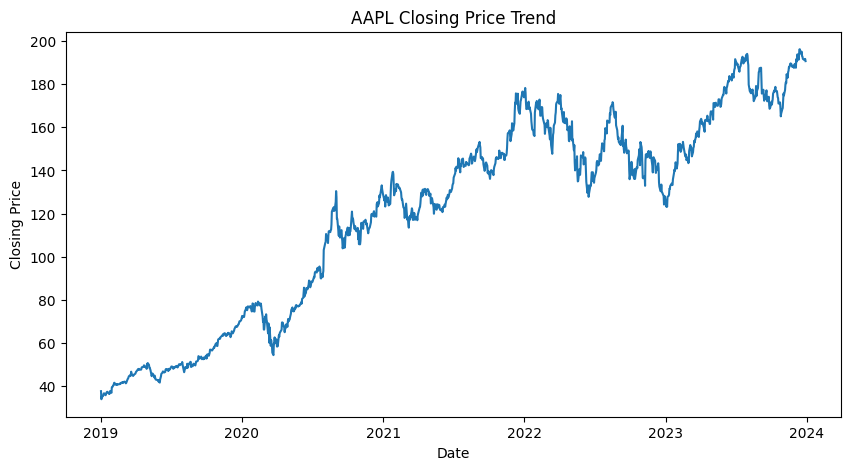

Price,Prev_Close
Ticker,
Date,
2019-01-03,37.538822
2019-01-04,33.799686
2019-01-07,35.242561
2019-01-08,35.164116
2019-01-09,35.834457


In [3]:
#LOADING DATASET
#Last 5 years dataset of apple stock
data = yf.download("AAPL", start="2019-01-01", end="2024-01-01")

# Display first 5 rows
data.head()
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("AAPL Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()



#To predict market trends, we use the previous day's closing price as an input feature to predict the next day's closing price.

data['Prev_Close'] = data['Close'].shift(1)

# Remove first row with missing value
data = data.dropna()

X = data[['Prev_Close']]
y = data['Close']

X.head()


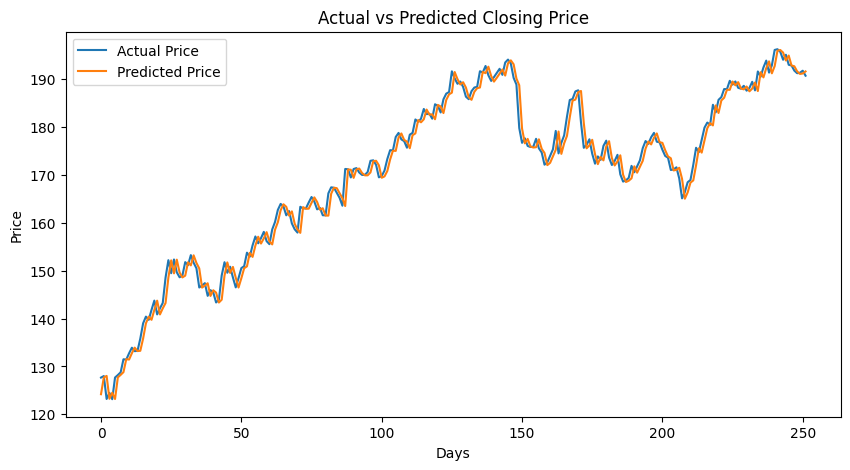

In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# Initializing and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict closing prices
y_pred = model.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.6525347690965733
Root Mean Squared Error (RMSE): 2.1373090705588695


In [11]:
## Evaluation & Analysis

### Performance Analysis
#The model successfully captures short-term stock price trends.
#Lower error values indicate reasonable predictive performance for trend analysis.

### Limitations
#- The model does not consider external factors like news or global events.
#- Sudden price fluctuations cannot be predicted accurately.

## Ethical Considerations & Responsible AI

#- Dataset is limited to one stock, which may introduce bias.
#- Predictions should not be treated as financial advice.
#- The model is designed to support decision-making, not replace human judgment.
### Conclusion & Future Scope

### Conclusion
#This project successfully demonstrates AI-based market trend prediction using historical stock data and a linear regression model.

### Future Scope
#- Implement LSTM deep learning models for improved time-series prediction.
#- Include multiple stocks and technical indicators.
#- Develop a real-time prediction dashboard.
